In [172]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_circles
plt.style.use('seaborn-white')

### Load the interactions summary from Human Promoter Analysis

In [173]:
#df = pd.read_csv('Human_Promoter_Analysis_v6_final/Interactions_Results/interactions_summary.txt',sep='\t')
#df = pd.read_csv('Human_Promoter_Analysis_v6_considerTopHit/Interactions_Results/interactions_summary.txt',sep='\t')

#df = pd.read_csv('IR_Experiment_final_euclidean_v8/Interactions_Results/interactions_summary_attnLimit-0.12.txt',sep='\t')
#df = pd.read_csv('IR_Experiment_final_euclidean_v8_CNN-MH/Interactions_Results/interactions_summary_attnLimit-0.12.txt',sep='\t')
df = pd.read_csv('IR_Experiment_final_euclidean_v8_CNN-MH/Interactions_Results_v9_run2/interactions_summary_attnLimit-0.12.txt',sep='\t')

#df = pd.read_csv('Human_Promoter_Analysis_v6_testingNew_forv7/Interactions_Results_tomtompval0.01/interactions_summary_withMaxAttnCheck.txt',sep='\t')

In [174]:
df.shape

(2926, 12)

In [175]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval
0,filter2<-->filter7,401,M1110_1.02,0.037316,M6547_1.02,0.004395,78.0,234.0,206.0,298.0,0.004381,0.009817
1,filter2<-->filter8,402,M1110_1.02,0.037316,M0609_1.02,0.036016,108.0,288.0,154.0,127.0,0.078274,0.124772
2,filter2<-->filter13,407,M1110_1.02,0.037316,M4459_1.02,0.004985,318.0,300.0,220.0,348.0,0.824704,0.920914
3,filter2<-->filter18,412,M1110_1.02,0.037316,M4604_1.02,0.028069,120.0,450.0,134.0,284.0,0.023967,0.044191
4,filter2<-->filter20,414,M1110_1.02,0.037316,M1589_1.02,0.040411,114.0,270.0,116.0,485.0,0.222525,0.310145


##### keep significant interactions

In [176]:
df = df[df['adjusted_pval']<0.05]

In [177]:
#df = df[(df['motif1_qval'] < 0.01) & (df['motif2_qval']<0.01)]

In [178]:
df.shape

(1910, 12)

##### Sort by observed interactions

In [179]:
df = df.sort_values(by='num_obs',ascending=False)

In [180]:
df.head(10)

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval
791,filter35<-->filter55,6389,M4459_1.02,0.000013,M4459_1.02,0.000014,102.0,66.0,388.0,460.0,3.404345e-23,9.818328e-21
514,filter27<-->filter35,5029,M0609_1.02,0.012142,M4459_1.02,0.000013,156.0,348.0,379.0,402.0,1.034545e-27,9.803547e-25
782,filter35<-->filter39,6373,M4459_1.02,0.000013,M4604_1.02,0.000596,6.0,12.0,375.0,455.0,2.916165e-20,3.917818e-18
525,filter27<-->filter55,5049,M0609_1.02,0.012142,M4459_1.02,0.000014,150.0,114.0,375.0,390.0,2.605547e-31,7.407199e-28
790,filter35<-->filter54,6388,M4459_1.02,0.000013,M4459_1.02,0.000795,54.0,414.0,375.0,388.0,1.663315e-19,1.958578e-17
1386,filter54<-->filter55,9315,M4459_1.02,0.000795,M4459_1.02,0.000014,18.0,48.0,374.0,378.0,1.850763e-18,1.659017e-16
516,filter27<-->filter39,5033,M0609_1.02,0.012142,M4604_1.02,0.000596,48.0,18.0,374.0,450.0,1.207681e-10,1.732722e-09
918,filter39<-->filter55,7035,M4604_1.02,0.000596,M4459_1.02,0.000014,504.0,78.0,373.0,429.0,7.187193e-24,2.270240e-21
797,filter35<-->filter67,6401,M4459_1.02,0.000013,M6482_1.02,0.000249,210.0,78.0,370.0,439.0,1.833560e-13,5.039758e-12
1466,filter55<-->filter132,9536,M4459_1.02,0.000014,M0609_1.02,0.002972,96.0,384.0,369.0,354.0,2.972475e-15,1.300049e-13


In [181]:
#df = df.head(250)

### Load the motif description file to annotate the interactions. 
Here I am using CISBP (U toronto) motif description file. 

In [182]:
df_annotate = pd.read_csv('../Basset_Splicing_IR-iDiffIR/Analysis_For_none_network-typeB_lotus_posThresh-0.60/MEME_analysis/Homo_sapiens_2019_01_14_4_17_pm/TF_Information_all_motifs.txt',sep='\t')

In [183]:
df_annotate.head()

,TF_ID,Family_ID,TSource_ID,Motif_ID,MSource_ID,DBID,TF_Name,TF_Species,TF_Status,Family_Name,...,MSource_Type,MSource_Author,MSource_Year,PMID,MSource_Version,TfSource_Name,TfSource_URL,TfSource_Year,TfSource_Month,TfSource_Day
0,T004843_1.02,F035_1.02,TS19_1.02,M2938_1.02,MS26_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,Transfac,Matys,2006,16381825,2014.2,Ensembl,http://www.ensembl.org/,2011,Oct,26
1,T004843_1.02,F035_1.02,TS19_1.02,M5917_1.02,MS20_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,SELEX,Jolma,2013,23332764,January 2013,Ensembl,http://www.ensembl.org/,2011,Oct,26
2,T004843_1.02,F035_1.02,TS19_1.02,M5918_1.02,MS20_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,SELEX,Jolma,2013,23332764,January 2013,Ensembl,http://www.ensembl.org/,2011,Oct,26
3,T004843_1.02,F035_1.02,TS19_1.02,M5919_1.02,MS20_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,SELEX,Jolma,2013,23332764,January 2013,Ensembl,http://www.ensembl.org/,2011,Oct,26
4,T004843_1.02,F035_1.02,TS19_1.02,M6144_1.02,MS18_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,HocoMoco,Kulakovskiy,2013,23175603,July 2014,Ensembl,http://www.ensembl.org/,2011,Oct,26


In [184]:
def get_annotation(motif_A, annotation_data=None, single_TF = False):
    #motif_A, motif_B = interaction.split('<-->')
    #print(motif_A)
    #print('there')
    TF_A = annotation_data[annotation_data['Motif_ID']==motif_A]['TF_Name']
    #TF_B = annotation_data[annotation_data['Motif_ID']==motif_B]['TF_Name']
    
    ##--If there is no annotation for a given motif--##
    #if len(TF_A)==0:
    TF_A = list(TF_A)
    #if len(TF_B)==0:
    #    TF_B = pd.Series([motif_B])
    ###################################################
    
    if single_TF:
        return TF_A[0]
    else:
        return ','.join(TF_A)
    #print('here')
    #return TF_A

In [185]:
df['TF1'] = df['motif1'].apply(get_annotation, annotation_data = df_annotate,single_TF=True)
df['TF2'] = df['motif2'].apply(get_annotation, annotation_data = df_annotate,single_TF=True)

In [186]:
df['TF_interaction'] = df.apply(lambda x: x['TF1']+r'$\longleftrightarrow$'+x['TF2'], axis=1)

In [187]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_interaction
791,filter35<-->filter55,6389,M4459_1.02,0.000013,M4459_1.02,0.000014,102.0,66.0,388.0,460.0,3.404345e-23,9.818328e-21,EGR1,EGR1,EGR1$\longleftrightarrow$EGR1
514,filter27<-->filter35,5029,M0609_1.02,0.012142,M4459_1.02,0.000013,156.0,348.0,379.0,402.0,1.034545e-27,9.803547e-25,DNMT1,EGR1,DNMT1$\longleftrightarrow$EGR1
782,filter35<-->filter39,6373,M4459_1.02,0.000013,M4604_1.02,0.000596,6.0,12.0,375.0,455.0,2.916165e-20,3.917818e-18,EGR1,ZNF263,EGR1$\longleftrightarrow$ZNF263
525,filter27<-->filter55,5049,M0609_1.02,0.012142,M4459_1.02,0.000014,150.0,114.0,375.0,390.0,2.605547e-31,7.407199e-28,DNMT1,EGR1,DNMT1$\longleftrightarrow$EGR1
790,filter35<-->filter54,6388,M4459_1.02,0.000013,M4459_1.02,0.000795,54.0,414.0,375.0,388.0,1.663315e-19,1.958578e-17,EGR1,EGR1,EGR1$\longleftrightarrow$EGR1


In [188]:
df = df[df['TF1']!=df['TF2']]

In [189]:
df.shape

(1741, 15)

In [190]:
df[(df['TF_interaction']=='EGR1'+r'$\longleftrightarrow$'+'MAZ') | (df['TF_interaction']=='MAZ'+r'$\longleftrightarrow$'+'EGR1')]

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_interaction
815,filter35<-->filter123,6457,M4459_1.02,0.000013,M6336_1.02,0.006135,246.0,78.0,290.0,285.0,1.842239e-11,3.168588e-10,EGR1,MAZ,EGR1$\longleftrightarrow$MAZ
1464,filter55<-->filter123,9527,M4459_1.02,0.000014,M6336_1.02,0.006135,42.0,66.0,289.0,274.0,1.558532e-13,4.401412e-12,EGR1,MAZ,EGR1$\longleftrightarrow$MAZ
1410,filter54<-->filter123,9383,M4459_1.02,0.000795,M6336_1.02,0.006135,240.0,72.0,283.0,227.0,3.633902e-10,4.624616e-09,EGR1,MAZ,EGR1$\longleftrightarrow$MAZ
1670,filter64<-->filter123,10778,M4459_1.02,0.007129,M6336_1.02,0.006135,144.0,60.0,280.0,405.0,1.467377e-08,1.260285e-07,EGR1,MAZ,EGR1$\longleftrightarrow$MAZ
1620,filter63<-->filter123,10643,M4459_1.02,0.010835,M6336_1.02,0.006135,24.0,6.0,266.0,212.0,1.004060e-04,3.401565e-04,EGR1,MAZ,EGR1$\longleftrightarrow$MAZ
480,filter25<-->filter123,4772,M4459_1.02,0.000058,M6336_1.02,0.006135,216.0,78.0,265.0,260.0,1.999021e-10,2.708000e-09,EGR1,MAZ,EGR1$\longleftrightarrow$MAZ
617,filter31<-->filter123,5795,M4459_1.02,0.000013,M6336_1.02,0.006135,54.0,78.0,264.0,218.0,1.392997e-07,9.415976e-07,EGR1,MAZ,EGR1$\longleftrightarrow$MAZ
1517,filter57<-->filter123,9812,M4459_1.02,0.000131,M6336_1.02,0.006135,354.0,168.0,262.0,288.0,1.914643e-10,2.604333e-09,EGR1,MAZ,EGR1$\longleftrightarrow$MAZ
1242,filter50<-->filter123,8797,M4459_1.02,0.016883,M6336_1.02,0.006135,240.0,90.0,250.0,273.0,5.549042e-05,2.003373e-04,EGR1,MAZ,EGR1$\longleftrightarrow$MAZ
2334,filter112<-->filter123,16082,M4459_1.02,0.009004,M6336_1.02,0.006135,132.0,84.0,233.0,231.0,1.092107e-07,7.559281e-07,EGR1,MAZ,EGR1$\longleftrightarrow$MAZ


#### fix A<->B vs B<->A

In [191]:
df = df.reset_index()

In [192]:
df.head()

,index,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_interaction
0,514,filter27<-->filter35,5029,M0609_1.02,0.012142,M4459_1.02,0.000013,156.0,348.0,379.0,402.0,1.034545e-27,9.803547e-25,DNMT1,EGR1,DNMT1$\longleftrightarrow$EGR1
1,782,filter35<-->filter39,6373,M4459_1.02,0.000013,M4604_1.02,0.000596,6.0,12.0,375.0,455.0,2.916165e-20,3.917818e-18,EGR1,ZNF263,EGR1$\longleftrightarrow$ZNF263
2,525,filter27<-->filter55,5049,M0609_1.02,0.012142,M4459_1.02,0.000014,150.0,114.0,375.0,390.0,2.605547e-31,7.407199e-28,DNMT1,EGR1,DNMT1$\longleftrightarrow$EGR1
3,516,filter27<-->filter39,5033,M0609_1.02,0.012142,M4604_1.02,0.000596,48.0,18.0,374.0,450.0,1.207681e-10,1.732722e-09,DNMT1,ZNF263,DNMT1$\longleftrightarrow$ZNF263
4,918,filter39<-->filter55,7035,M4604_1.02,0.000596,M4459_1.02,0.000014,504.0,78.0,373.0,429.0,7.187193e-24,2.270240e-21,ZNF263,EGR1,ZNF263$\longleftrightarrow$EGR1


In [193]:
all_interactions_dict = []
for i in range(df.shape[0]):
    TF1 = df['TF1'][i]
    TF2 = df['TF2'][i]
    TF_intr = TF1+r'$\longleftrightarrow$'+TF2
    TF_intr_rev = TF2+r'$\longleftrightarrow$'+TF1
    if TF_intr not in all_interactions_dict and TF_intr_rev not in all_interactions_dict:
        all_interactions_dict.append(TF_intr)
    elif TF_intr in all_interactions_dict:
        df['TF_interaction'][i] = TF_intr
    elif TF_intr_rev in all_interactions_dict:
        df['TF_interaction'][i] = TF_intr_rev

/s/jawar/h/nobackup/fahad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/s/jawar/h/nobackup/fahad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [194]:
df.head(20)

,index,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_interaction
0,514,filter27<-->filter35,5029,M0609_1.02,0.012142,M4459_1.02,0.000013,156.0,348.0,379.0,402.0,1.034545e-27,9.803547e-25,DNMT1,EGR1,DNMT1$\longleftrightarrow$EGR1
1,782,filter35<-->filter39,6373,M4459_1.02,0.000013,M4604_1.02,0.000596,6.0,12.0,375.0,455.0,2.916165e-20,3.917818e-18,EGR1,ZNF263,EGR1$\longleftrightarrow$ZNF263
2,525,filter27<-->filter55,5049,M0609_1.02,0.012142,M4459_1.02,0.000014,150.0,114.0,375.0,390.0,2.605547e-31,7.407199e-28,DNMT1,EGR1,DNMT1$\longleftrightarrow$EGR1
3,516,filter27<-->filter39,5033,M0609_1.02,0.012142,M4604_1.02,0.000596,48.0,18.0,374.0,450.0,1.207681e-10,1.732722e-09,DNMT1,ZNF263,DNMT1$\longleftrightarrow$ZNF263
4,918,filter39<-->filter55,7035,M4604_1.02,0.000596,M4459_1.02,0.000014,504.0,78.0,373.0,429.0,7.187193e-24,2.270240e-21,ZNF263,EGR1,EGR1$\longleftrightarrow$ZNF263
5,797,filter35<-->filter67,6401,M4459_1.02,0.000013,M6482_1.02,0.000249,210.0,78.0,370.0,439.0,1.833560e-13,5.039758e-12,EGR1,SP7,EGR1$\longleftrightarrow$SP7
6,1466,filter55<-->filter132,9536,M4459_1.02,0.000014,M0609_1.02,0.002972,96.0,384.0,369.0,354.0,2.972475e-15,1.300049e-13,EGR1,DNMT1,DNMT1$\longleftrightarrow$EGR1
7,817,filter35<-->filter132,6466,M4459_1.02,0.000013,M0609_1.02,0.002972,252.0,60.0,369.0,377.0,8.237352e-26,3.998130e-23,EGR1,DNMT1,DNMT1$\longleftrightarrow$EGR1
8,1446,filter55<-->filter67,9471,M4459_1.02,0.000014,M6482_1.02,0.000249,84.0,288.0,365.0,438.0,5.223083e-11,8.197110e-10,EGR1,SP7,EGR1$\longleftrightarrow$SP7
9,820,filter35<-->filter137,6471,M4459_1.02,0.000013,M2314_1.02,0.043771,234.0,432.0,363.0,398.0,1.314790e-26,8.051020e-24,EGR1,SP2,EGR1$\longleftrightarrow$SP2


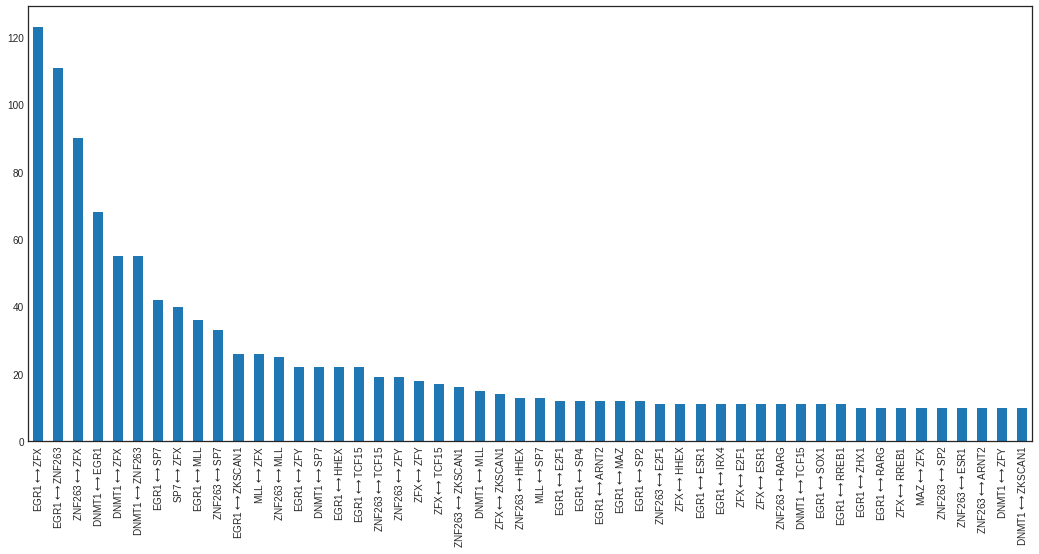

In [195]:
df['TF_interaction'].value_counts()[:50].plot(kind='bar', figsize=(18,8))

In [196]:
df.shape

(1741, 16)

In [197]:
df['TF_interaction'].value_counts()

EGR1$\longleftrightarrow$ZFX        123
EGR1$\longleftrightarrow$ZNF263     111
ZNF263$\longleftrightarrow$ZFX       90
DNMT1$\longleftrightarrow$EGR1       68
DNMT1$\longleftrightarrow$ZFX        55
                                   ... 
RREB1$\longleftrightarrow$ZFY         1
ARNT2$\longleftrightarrow$E2F1        1
FOXN3$\longleftrightarrow$ZNF263      1
ZHX1$\longleftrightarrow$ESR1         1
ARNT2$\longleftrightarrow$MAZ         1
Name: TF_interaction, Length: 241, dtype: int64

##### Just picking a single annotated TF for a given motif

In [198]:
#df['annotated_interaction_single'] = df['interaction'].apply(get_annotation,annotation_data = df_annotate, single_TF = True)

In [199]:
df.head(10)

,index,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_interaction
0,514,filter27<-->filter35,5029,M0609_1.02,0.012142,M4459_1.02,0.000013,156.0,348.0,379.0,402.0,1.034545e-27,9.803547e-25,DNMT1,EGR1,DNMT1$\longleftrightarrow$EGR1
1,782,filter35<-->filter39,6373,M4459_1.02,0.000013,M4604_1.02,0.000596,6.0,12.0,375.0,455.0,2.916165e-20,3.917818e-18,EGR1,ZNF263,EGR1$\longleftrightarrow$ZNF263
2,525,filter27<-->filter55,5049,M0609_1.02,0.012142,M4459_1.02,0.000014,150.0,114.0,375.0,390.0,2.605547e-31,7.407199e-28,DNMT1,EGR1,DNMT1$\longleftrightarrow$EGR1
3,516,filter27<-->filter39,5033,M0609_1.02,0.012142,M4604_1.02,0.000596,48.0,18.0,374.0,450.0,1.207681e-10,1.732722e-09,DNMT1,ZNF263,DNMT1$\longleftrightarrow$ZNF263
4,918,filter39<-->filter55,7035,M4604_1.02,0.000596,M4459_1.02,0.000014,504.0,78.0,373.0,429.0,7.187193e-24,2.270240e-21,ZNF263,EGR1,EGR1$\longleftrightarrow$ZNF263
5,797,filter35<-->filter67,6401,M4459_1.02,0.000013,M6482_1.02,0.000249,210.0,78.0,370.0,439.0,1.833560e-13,5.039758e-12,EGR1,SP7,EGR1$\longleftrightarrow$SP7
6,1466,filter55<-->filter132,9536,M4459_1.02,0.000014,M0609_1.02,0.002972,96.0,384.0,369.0,354.0,2.972475e-15,1.300049e-13,EGR1,DNMT1,DNMT1$\longleftrightarrow$EGR1
7,817,filter35<-->filter132,6466,M4459_1.02,0.000013,M0609_1.02,0.002972,252.0,60.0,369.0,377.0,8.237352e-26,3.998130e-23,EGR1,DNMT1,DNMT1$\longleftrightarrow$EGR1
8,1446,filter55<-->filter67,9471,M4459_1.02,0.000014,M6482_1.02,0.000249,84.0,288.0,365.0,438.0,5.223083e-11,8.197110e-10,EGR1,SP7,EGR1$\longleftrightarrow$SP7
9,820,filter35<-->filter137,6471,M4459_1.02,0.000013,M2314_1.02,0.043771,234.0,432.0,363.0,398.0,1.314790e-26,8.051020e-24,EGR1,SP2,EGR1$\longleftrightarrow$SP2


### Plot observed values of interaction for N interactions

In [200]:
#N = 50
#df.head(N).plot(x='annotated_interaction_single', y='observed_pos', kind='bar', figsize=(18,8))

### Scatter plot of mean distance of interaction vs observed interactions

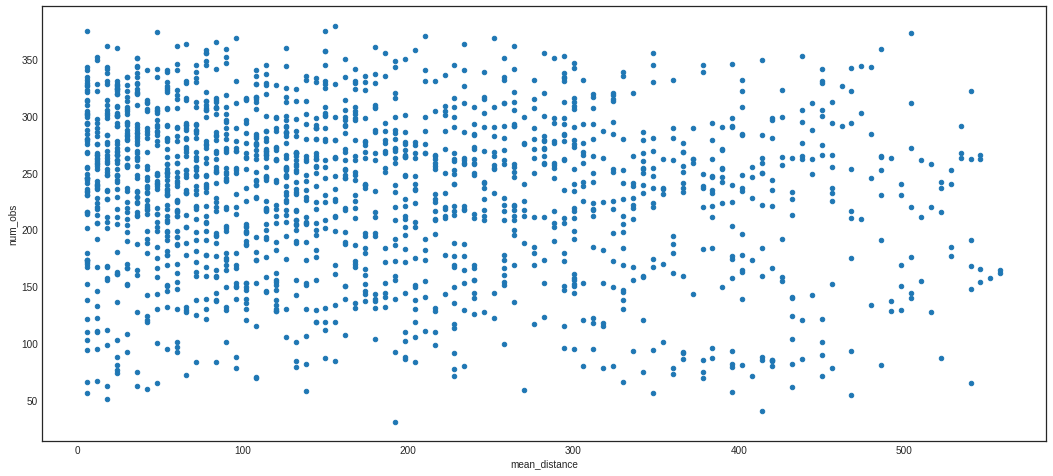

In [201]:
#N = 100
df.plot(x='mean_distance', y='num_obs', kind='scatter', figsize=(18,8))

### Distribution of mean distance of interaction

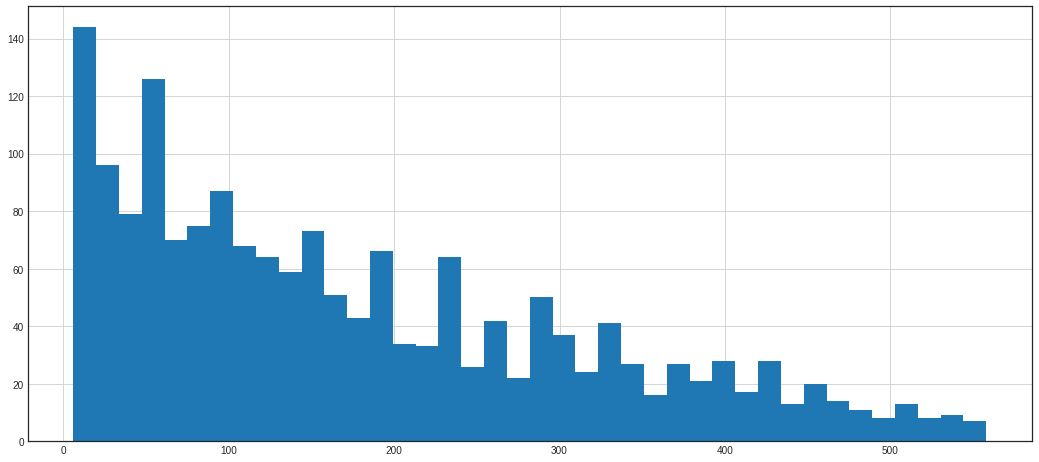

In [202]:
df['mean_distance'].hist(bins=40, figsize=(18,8))

In [203]:
np.mean(df['mean_distance']),np.median(df['mean_distance'])

(177.48765077541643, 144.0)

### Most frequent TFs involved in interactions

In [204]:
#df['TF_A'] = df['annotated_interaction_single'].apply(lambda x: x.split('<-->')[0])
#df['TF_B'] = df['annotated_interaction_single'].apply(lambda x: x.split('<-->')[1])

In [205]:
df.head()

,index,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_interaction
0,514,filter27<-->filter35,5029,M0609_1.02,0.012142,M4459_1.02,0.000013,156.0,348.0,379.0,402.0,1.034545e-27,9.803547e-25,DNMT1,EGR1,DNMT1$\longleftrightarrow$EGR1
1,782,filter35<-->filter39,6373,M4459_1.02,0.000013,M4604_1.02,0.000596,6.0,12.0,375.0,455.0,2.916165e-20,3.917818e-18,EGR1,ZNF263,EGR1$\longleftrightarrow$ZNF263
2,525,filter27<-->filter55,5049,M0609_1.02,0.012142,M4459_1.02,0.000014,150.0,114.0,375.0,390.0,2.605547e-31,7.407199e-28,DNMT1,EGR1,DNMT1$\longleftrightarrow$EGR1
3,516,filter27<-->filter39,5033,M0609_1.02,0.012142,M4604_1.02,0.000596,48.0,18.0,374.0,450.0,1.207681e-10,1.732722e-09,DNMT1,ZNF263,DNMT1$\longleftrightarrow$ZNF263
4,918,filter39<-->filter55,7035,M4604_1.02,0.000596,M4459_1.02,0.000014,504.0,78.0,373.0,429.0,7.187193e-24,2.270240e-21,ZNF263,EGR1,EGR1$\longleftrightarrow$ZNF263


In [206]:
all_TFs = df['TF1'].value_counts().to_dict()
all_TFs_b = df['TF2'].value_counts().to_dict()

all_TFs.update(all_TFs_b)
all_TFs = pd.Series(all_TFs).sort_values(ascending=False)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f21908ca5c0>,)

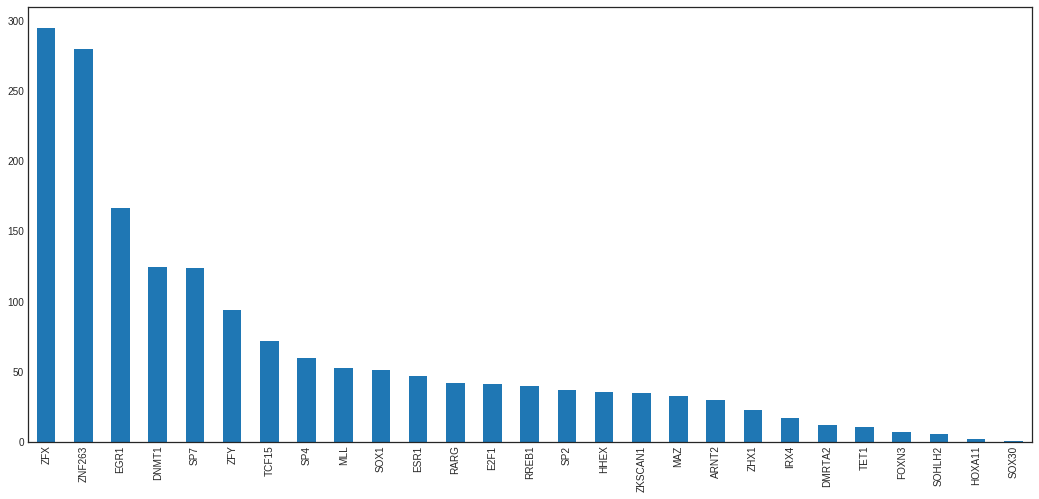

In [207]:
all_TFs.plot(kind='bar',figsize=(18,8)),

### Most Frequent TF Family Interactions

In [208]:
tf_family_dict = {}
for TF in df_annotate['TF_Name']:
    tf_family_dict[TF] = df_annotate[df_annotate['TF_Name']==TF]['Family_Name'].iloc[0]

In [209]:
df['TF1_Family'] = df['TF1'].apply(lambda x: tf_family_dict[x] if x in tf_family_dict else 'UNKNOWN')
df['TF2_Family'] = df['TF2'].apply(lambda x: tf_family_dict[x] if x in tf_family_dict else 'UNKNOWN')

In [210]:
df.head(10)

,index,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_interaction,TF1_Family,TF2_Family
0,514,filter27<-->filter35,5029,M0609_1.02,0.012142,M4459_1.02,0.000013,156.0,348.0,379.0,402.0,1.034545e-27,9.803547e-25,DNMT1,EGR1,DNMT1$\longleftrightarrow$EGR1,CxxC,C2H2 ZF
1,782,filter35<-->filter39,6373,M4459_1.02,0.000013,M4604_1.02,0.000596,6.0,12.0,375.0,455.0,2.916165e-20,3.917818e-18,EGR1,ZNF263,EGR1$\longleftrightarrow$ZNF263,C2H2 ZF,C2H2 ZF
2,525,filter27<-->filter55,5049,M0609_1.02,0.012142,M4459_1.02,0.000014,150.0,114.0,375.0,390.0,2.605547e-31,7.407199e-28,DNMT1,EGR1,DNMT1$\longleftrightarrow$EGR1,CxxC,C2H2 ZF
3,516,filter27<-->filter39,5033,M0609_1.02,0.012142,M4604_1.02,0.000596,48.0,18.0,374.0,450.0,1.207681e-10,1.732722e-09,DNMT1,ZNF263,DNMT1$\longleftrightarrow$ZNF263,CxxC,C2H2 ZF
4,918,filter39<-->filter55,7035,M4604_1.02,0.000596,M4459_1.02,0.000014,504.0,78.0,373.0,429.0,7.187193e-24,2.270240e-21,ZNF263,EGR1,EGR1$\longleftrightarrow$ZNF263,C2H2 ZF,C2H2 ZF
5,797,filter35<-->filter67,6401,M4459_1.02,0.000013,M6482_1.02,0.000249,210.0,78.0,370.0,439.0,1.833560e-13,5.039758e-12,EGR1,SP7,EGR1$\longleftrightarrow$SP7,C2H2 ZF,C2H2 ZF
6,1466,filter55<-->filter132,9536,M4459_1.02,0.000014,M0609_1.02,0.002972,96.0,384.0,369.0,354.0,2.972475e-15,1.300049e-13,EGR1,DNMT1,DNMT1$\longleftrightarrow$EGR1,C2H2 ZF,CxxC
7,817,filter35<-->filter132,6466,M4459_1.02,0.000013,M0609_1.02,0.002972,252.0,60.0,369.0,377.0,8.237352e-26,3.998130e-23,EGR1,DNMT1,DNMT1$\longleftrightarrow$EGR1,C2H2 ZF,CxxC
8,1446,filter55<-->filter67,9471,M4459_1.02,0.000014,M6482_1.02,0.000249,84.0,288.0,365.0,438.0,5.223083e-11,8.197110e-10,EGR1,SP7,EGR1$\longleftrightarrow$SP7,C2H2 ZF,C2H2 ZF
9,820,filter35<-->filter137,6471,M4459_1.02,0.000013,M2314_1.02,0.043771,234.0,432.0,363.0,398.0,1.314790e-26,8.051020e-24,EGR1,SP2,EGR1$\longleftrightarrow$SP2,C2H2 ZF,C2H2 ZF


In [211]:
df['Family_Interaction'] = df.apply(lambda x: x['TF1_Family']+r'$\longleftrightarrow$'+x['TF2_Family'],axis=1)

In [212]:
df.head()

,index,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_interaction,TF1_Family,TF2_Family,Family_Interaction
0,514,filter27<-->filter35,5029,M0609_1.02,0.012142,M4459_1.02,0.000013,156.0,348.0,379.0,402.0,1.034545e-27,9.803547e-25,DNMT1,EGR1,DNMT1$\longleftrightarrow$EGR1,CxxC,C2H2 ZF,CxxC$\longleftrightarrow$C2H2 ZF
1,782,filter35<-->filter39,6373,M4459_1.02,0.000013,M4604_1.02,0.000596,6.0,12.0,375.0,455.0,2.916165e-20,3.917818e-18,EGR1,ZNF263,EGR1$\longleftrightarrow$ZNF263,C2H2 ZF,C2H2 ZF,C2H2 ZF$\longleftrightarrow$C2H2 ZF
2,525,filter27<-->filter55,5049,M0609_1.02,0.012142,M4459_1.02,0.000014,150.0,114.0,375.0,390.0,2.605547e-31,7.407199e-28,DNMT1,EGR1,DNMT1$\longleftrightarrow$EGR1,CxxC,C2H2 ZF,CxxC$\longleftrightarrow$C2H2 ZF
3,516,filter27<-->filter39,5033,M0609_1.02,0.012142,M4604_1.02,0.000596,48.0,18.0,374.0,450.0,1.207681e-10,1.732722e-09,DNMT1,ZNF263,DNMT1$\longleftrightarrow$ZNF263,CxxC,C2H2 ZF,CxxC$\longleftrightarrow$C2H2 ZF
4,918,filter39<-->filter55,7035,M4604_1.02,0.000596,M4459_1.02,0.000014,504.0,78.0,373.0,429.0,7.187193e-24,2.270240e-21,ZNF263,EGR1,EGR1$\longleftrightarrow$ZNF263,C2H2 ZF,C2H2 ZF,C2H2 ZF$\longleftrightarrow$C2H2 ZF


In [213]:
all_interactions_dict = []
for i in range(df.shape[0]):
    TF1 = df['TF1_Family'][i]
    TF2 = df['TF2_Family'][i]
    TF_intr = TF1+r'$\longleftrightarrow$'+TF2
    TF_intr_rev = TF2+r'$\longleftrightarrow$'+TF1
    if TF_intr not in all_interactions_dict and TF_intr_rev not in all_interactions_dict:
        all_interactions_dict.append(TF_intr)
    elif TF_intr in all_interactions_dict:
        df['Family_Interaction'][i] = TF_intr
    elif TF_intr_rev in all_interactions_dict:
        df['Family_Interaction'][i] = TF_intr_rev

/s/jawar/h/nobackup/fahad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/s/jawar/h/nobackup/fahad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [214]:
df.head(5)

,index,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_interaction,TF1_Family,TF2_Family,Family_Interaction
0,514,filter27<-->filter35,5029,M0609_1.02,0.012142,M4459_1.02,0.000013,156.0,348.0,379.0,402.0,1.034545e-27,9.803547e-25,DNMT1,EGR1,DNMT1$\longleftrightarrow$EGR1,CxxC,C2H2 ZF,CxxC$\longleftrightarrow$C2H2 ZF
1,782,filter35<-->filter39,6373,M4459_1.02,0.000013,M4604_1.02,0.000596,6.0,12.0,375.0,455.0,2.916165e-20,3.917818e-18,EGR1,ZNF263,EGR1$\longleftrightarrow$ZNF263,C2H2 ZF,C2H2 ZF,C2H2 ZF$\longleftrightarrow$C2H2 ZF
2,525,filter27<-->filter55,5049,M0609_1.02,0.012142,M4459_1.02,0.000014,150.0,114.0,375.0,390.0,2.605547e-31,7.407199e-28,DNMT1,EGR1,DNMT1$\longleftrightarrow$EGR1,CxxC,C2H2 ZF,CxxC$\longleftrightarrow$C2H2 ZF
3,516,filter27<-->filter39,5033,M0609_1.02,0.012142,M4604_1.02,0.000596,48.0,18.0,374.0,450.0,1.207681e-10,1.732722e-09,DNMT1,ZNF263,DNMT1$\longleftrightarrow$ZNF263,CxxC,C2H2 ZF,CxxC$\longleftrightarrow$C2H2 ZF
4,918,filter39<-->filter55,7035,M4604_1.02,0.000596,M4459_1.02,0.000014,504.0,78.0,373.0,429.0,7.187193e-24,2.270240e-21,ZNF263,EGR1,EGR1$\longleftrightarrow$ZNF263,C2H2 ZF,C2H2 ZF,C2H2 ZF$\longleftrightarrow$C2H2 ZF


In [215]:
df.to_csv('ATTN_IR_all_significant_TFs.csv')

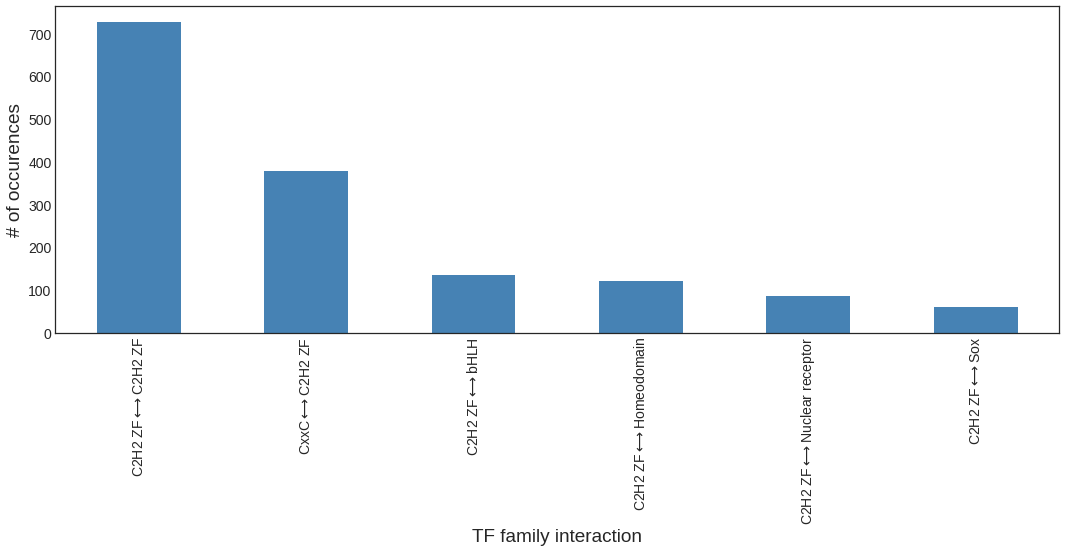

In [216]:
ax = df['Family_Interaction'].value_counts()[:6].plot(kind='bar',color='steelblue',figsize=(18,6),fontsize=14)
ax.set_xlabel("TF family interaction",fontsize=19)
ax.set_ylabel("# of occurences",fontsize=19)
ax.xaxis.set_tick_params(rotation=90)
#ax.set_title('Top interacting families of transcription factors',fontsize=18)
plt.savefig('Family_interactions_IR.pdf',bbox_inches='tight')

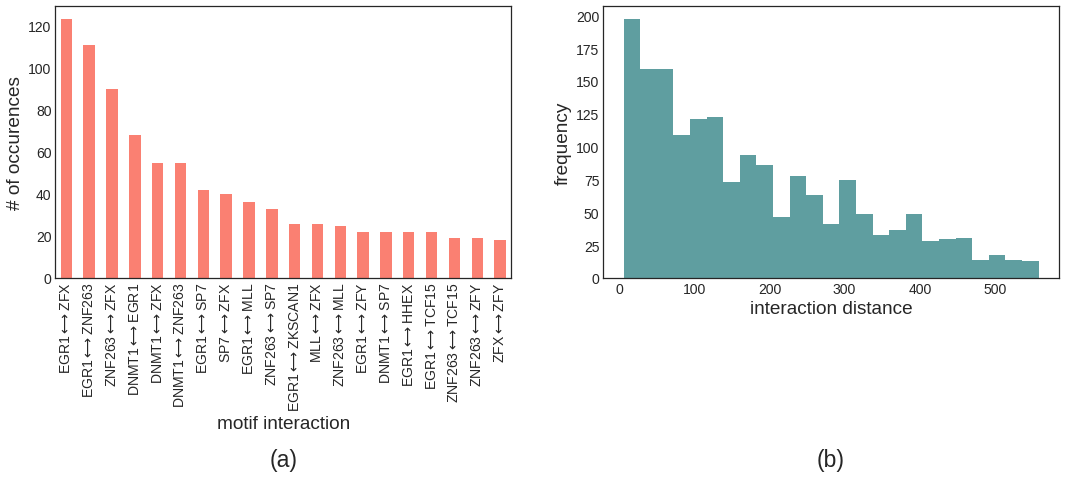

In [217]:
fig, axes = plt.subplots(1, 2)
ax1 = df['TF_interaction'].value_counts()[:20].plot(kind='bar',color='salmon',figsize=(18,5),fontsize=14,ax=axes[0])
ax1.set_xlabel("motif interaction",fontsize=19)
ax1.set_ylabel("# of occurences",fontsize=19)
ax1.xaxis.set_tick_params(rotation=90)
#ax1.set_title('Most frequent interactions',fontsize=16)

#ax1 = df['Family_Interaction'].value_counts()[:6].plot(kind='bar',color='salmon',figsize=(18,5),fontsize=14,ax=axes[0])
#ax1.set_xlabel("TF family interaction",fontsize=19)
#ax1.set_ylabel("# of occurences",fontsize=19)
#ax1.xaxis.set_tick_params(rotation=90)



ax2 = df['mean_distance'].plot(kind='hist',bins=25, figsize=(18,5),color='cadetblue',fontsize=14,ax=axes[1])
ax2.set_xlabel("interaction distance",fontsize=19)
ax2.set_ylabel("frequency",fontsize=19)
ax2.xaxis.set_tick_params(rotation=0)
#ax2.set_title('Distribution of motif interaction distances',fontsize=16)

ax1.text(0.5,-0.69, "(a)", size=23, ha="center", 
         transform=ax1.transAxes)
ax2.text(0.5,-0.69, "(b)", size=23, ha="center", 
         transform=ax2.transAxes)
#df_list[count].plot(ax=axes[1,1])
plt.savefig('Main_IR.pdf',bbox_inches='tight')

In [218]:
df['motifsOnlyInt'] = df['motif1']+':'+df['motif2']
df['familyOnlyInt'] = df['TF1_Family']+':'+df['TF2_Family']
df.to_csv('ATTN_IR_Final.txt',sep='\t')
df.head()

,index,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,...,pval,adjusted_pval,TF1,TF2,TF_interaction,TF1_Family,TF2_Family,Family_Interaction,motifsOnlyInt,familyOnlyInt
0,514,filter27<-->filter35,5029,M0609_1.02,0.012142,M4459_1.02,0.000013,156.0,348.0,379.0,...,1.034545e-27,9.803547e-25,DNMT1,EGR1,DNMT1$\longleftrightarrow$EGR1,CxxC,C2H2 ZF,CxxC$\longleftrightarrow$C2H2 ZF,M0609_1.02:M4459_1.02,CxxC:C2H2 ZF
1,782,filter35<-->filter39,6373,M4459_1.02,0.000013,M4604_1.02,0.000596,6.0,12.0,375.0,...,2.916165e-20,3.917818e-18,EGR1,ZNF263,EGR1$\longleftrightarrow$ZNF263,C2H2 ZF,C2H2 ZF,C2H2 ZF$\longleftrightarrow$C2H2 ZF,M4459_1.02:M4604_1.02,C2H2 ZF:C2H2 ZF
2,525,filter27<-->filter55,5049,M0609_1.02,0.012142,M4459_1.02,0.000014,150.0,114.0,375.0,...,2.605547e-31,7.407199e-28,DNMT1,EGR1,DNMT1$\longleftrightarrow$EGR1,CxxC,C2H2 ZF,CxxC$\longleftrightarrow$C2H2 ZF,M0609_1.02:M4459_1.02,CxxC:C2H2 ZF
3,516,filter27<-->filter39,5033,M0609_1.02,0.012142,M4604_1.02,0.000596,48.0,18.0,374.0,...,1.207681e-10,1.732722e-09,DNMT1,ZNF263,DNMT1$\longleftrightarrow$ZNF263,CxxC,C2H2 ZF,CxxC$\longleftrightarrow$C2H2 ZF,M0609_1.02:M4604_1.02,CxxC:C2H2 ZF
4,918,filter39<-->filter55,7035,M4604_1.02,0.000596,M4459_1.02,0.000014,504.0,78.0,373.0,...,7.187193e-24,2.270240e-21,ZNF263,EGR1,EGR1$\longleftrightarrow$ZNF263,C2H2 ZF,C2H2 ZF,C2H2 ZF$\longleftrightarrow$C2H2 ZF,M4604_1.02:M4459_1.02,C2H2 ZF:C2H2 ZF


In [243]:
ATTN_unique = df.loc[df['TF_interaction'].drop_duplicates().index][['filter_interaction','TF_interaction','Family_Interaction','adjusted_pval']]
ATTN_unique.to_csv('ATTN_unique_IR_interactions.csv',index=False)

### Annotate Interactions using TRUSTv2 (and other sources)

In [219]:
#dictionaries with genes/TFs as keys and [target_gene/TF, role, PUBMID ID] as value
with open('/s/jawar/h/nobackup/fahad/Human_Chromatin/TRUSTv2/human_co-regulate_dict.pckl','rb') as f:
    human_dict = pickle.load(f)

    
with open('/s/jawar/h/nobackup/fahad/Human_Chromatin/TRUSTv2/mouse_co-regulate_dict.pckl','rb') as f:
    mouse_dict = pickle.load(f)  

#### NOTE
The following doesn't test for a group of TFs belonging to the same subfamily (for instance, SP*) and checking for their known co-occurence with another TF. For example, SP1 shares almost 90% of its binding site motif with other SP members (SP4 specifically) and TRRUSTv2 reports its interaction with WT1. It means we can label SP4<-->WT1 interaction to be known (reported in TRRUSTv2). However, we aren't checking for those cases. This means the number of interactions that we can annotate is potentially a lot higher than what is reported next.

In [220]:
def annotate_interaction(x, intr_dict = None):
    TFs_A,TFs_B = x.split(r'$\longleftrightarrow$')
    TFs_A = TFs_A.split(',')
    TFs_B = TFs_B.split(',')
    
    for TF_A in TFs_A:
        if TF_A not in intr_dict:
            continue
        for TF_B in TFs_B:
            if TF_B not in intr_dict:
                continue
            TF_A_targets = intr_dict[TF_A][:,0]
            TF_B_targets = intr_dict[TF_B][:,0]
            if len(set.intersection(set(TF_A_targets),set(TF_B_targets))) != 0:
                return 1 #interaction found (the two TFs have shared targets)
            
    
    return 0

In [221]:
df['Interaction_in_TRUSTv2'] = df['TF_interaction'].apply(annotate_interaction, intr_dict = human_dict)

In [222]:
df['Interaction_in_TRUSTv2'].value_counts()

0    1592
1     149
Name: Interaction_in_TRUSTv2, dtype: int64

In [223]:
df_resTRUSTv2 = df[df['Interaction_in_TRUSTv2']==1][df.columns[[0,1,3,4,5,6,7,8,12,13,14,15,16,17,18]]]

In [224]:
df.shape

(1741, 22)

In [225]:
df_resTRUSTv2.shape

(149, 15)

In [226]:
df_resTRUSTv2

,index,filter_interaction,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,adjusted_pval,TF1,TF2,TF_interaction,TF1_Family,TF2_Family,Family_Interaction
0,514,filter27<-->filter35,M0609_1.02,0.012142,M4459_1.02,0.000013,156.0,348.0,9.803547e-25,DNMT1,EGR1,DNMT1$\longleftrightarrow$EGR1,CxxC,C2H2 ZF,CxxC$\longleftrightarrow$C2H2 ZF
2,525,filter27<-->filter55,M0609_1.02,0.012142,M4459_1.02,0.000014,150.0,114.0,7.407199e-28,DNMT1,EGR1,DNMT1$\longleftrightarrow$EGR1,CxxC,C2H2 ZF,CxxC$\longleftrightarrow$C2H2 ZF
6,1466,filter55<-->filter132,M4459_1.02,0.000014,M0609_1.02,0.002972,96.0,384.0,1.300049e-13,EGR1,DNMT1,DNMT1$\longleftrightarrow$EGR1,C2H2 ZF,CxxC,CxxC$\longleftrightarrow$C2H2 ZF
7,817,filter35<-->filter132,M4459_1.02,0.000013,M0609_1.02,0.002972,252.0,60.0,3.998130e-23,EGR1,DNMT1,DNMT1$\longleftrightarrow$EGR1,C2H2 ZF,CxxC,CxxC$\longleftrightarrow$C2H2 ZF
11,524,filter27<-->filter54,M0609_1.02,0.012142,M4459_1.02,0.000795,18.0,30.0,1.488867e-22,DNMT1,EGR1,DNMT1$\longleftrightarrow$EGR1,CxxC,C2H2 ZF,CxxC$\longleftrightarrow$C2H2 ZF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1340,154,filter8<-->filter25,M0609_1.02,0.036016,M4459_1.02,0.000058,42.0,12.0,1.448969e-05,DNMT1,EGR1,DNMT1$\longleftrightarrow$EGR1,CxxC,C2H2 ZF,CxxC$\longleftrightarrow$C2H2 ZF
1365,256,filter13<-->filter89,M4459_1.02,0.004985,M0609_1.02,0.006953,126.0,198.0,7.002489e-03,EGR1,DNMT1,DNMT1$\longleftrightarrow$EGR1,C2H2 ZF,CxxC,CxxC$\longleftrightarrow$C2H2 ZF
1377,166,filter8<-->filter50,M0609_1.02,0.036016,M4459_1.02,0.016883,210.0,270.0,7.053120e-04,DNMT1,EGR1,DNMT1$\longleftrightarrow$EGR1,CxxC,C2H2 ZF,CxxC$\longleftrightarrow$C2H2 ZF
1440,151,filter8<-->filter13,M0609_1.02,0.036016,M4459_1.02,0.004985,36.0,222.0,5.852112e-07,DNMT1,EGR1,DNMT1$\longleftrightarrow$EGR1,CxxC,C2H2 ZF,CxxC$\longleftrightarrow$C2H2 ZF


In [227]:
df_resTRUSTv2[['TF_interaction','TF1_Family','TF2_Family','adjusted_pval']].groupby('TF_interaction').max()

,TF1_Family,TF2_Family,adjusted_pval
TF_interaction,,,
DNMT1$\longleftrightarrow$E2F1,E2F,E2F,4.151392e-04
DNMT1$\longleftrightarrow$EGR1,CxxC,CxxC,4.943389e-02
DNMT1$\longleftrightarrow$ESR1,Nuclear receptor,Nuclear receptor,5.551734e-03
DNMT1$\longleftrightarrow$SP4,CxxC,CxxC,6.187457e-04
E2F1$\longleftrightarrow$ESR1,E2F,Nuclear receptor,8.245818e-07
E2F1$\longleftrightarrow$SP4,E2F,C2H2 ZF,1.473596e-10
EGR1$\longleftrightarrow$E2F1,E2F,E2F,6.544085e-04
EGR1$\longleftrightarrow$ESR1,C2H2 ZF,Nuclear receptor,5.488973e-05
EGR1$\longleftrightarrow$MAZ,C2H2 ZF,C2H2 ZF,2.647254e-03


### Motif Families Enriched Analysis

In [57]:
tf_family_dict = {}
for TF in df_annotate['Motif_ID']:
    tf_family_dict[TF] = df_annotate[df_annotate['Motif_ID']==TF]['Family_Name'].iloc[0]

In [129]:
df_pos = pd.read_csv('IR_Experiment_final_euclidean_v8_CNN-MH//Motif_Analysis/tomtom/tomtom.tsv',sep='\t')

#df_pos = pd.read_csv('IR_analysis_v8_Basset_Net-typeA_dist-pearson/Motif_Analysis/tomtom/tomtom.tsv',sep='\t')

#df_pos = pd.read_csv('IR_analysis_v8_Basset_Net-typeA/Motif_Analysis/tomtom/tomtom.tsv',sep='\t')

df_pos['TF'] = df_pos['Target_ID'].apply(get_annotation, annotation_data = df_annotate,single_TF=False)

In [130]:
df_neg = pd.read_csv('IR_Experiment_final_euclidean_v8_CNN-MH/Motif_Analysis_Negative/tomtom/tomtom.tsv',sep='\t')

#df_neg = pd.read_csv('IR_analysis_v8_Basset_Net-typeA_dist-pearson/Motif_Analysis_Negative/tomtom/tomtom.tsv',sep='\t')

#df_neg = pd.read_csv('IR_analysis_v8_Basset_Net-typeA/Motif_Analysis_Negative/tomtom/tomtom.tsv',sep='\t')

df_neg['TF'] = df_neg['Target_ID'].apply(get_annotation, annotation_data = df_annotate,single_TF=False)

In [131]:
#df_pos = df_pos.loc[df_pos.groupby('Query_ID')['q-value'].idxmin()]
#df_neg = df_neg.loc[df_neg.groupby('Query_ID')['q-value'].idxmin()]

In [132]:
df_pos = df_pos[df_pos['q-value']<0.01]
df_neg = df_neg[df_neg['q-value']<0.01]

In [133]:
df_pos['Family'] = df_pos['Target_ID'].apply(lambda x: tf_family_dict[x] if x in tf_family_dict else 'UNKNOWN')

In [134]:
df_neg['Family'] = df_neg['Target_ID'].apply(lambda x: tf_family_dict[x] if x in tf_family_dict else 'UNKNOWN')

In [135]:
df_pos_res = df_pos['Family'].value_counts()/df_pos.shape[0]

In [136]:
df_neg_res = df_neg['Family'].value_counts()/df_neg.shape[0]

In [137]:
df_pos.head()

,Query_ID,Target_ID,Optimal_offset,p-value,E-value,q-value,Overlap,Query_consensus,Target_consensus,Orientation,TF,Family
7,filter7,M6547_1.02,3.0,3.049430e-06,0.002235,0.004395,13.0,CGGGGTTGGGGGG,GCCGAGGCCTGGGGCCCCC,-,"ZFX,ZFY",C2H2 ZF
15,filter13,M4459_1.02,7.0,3.413670e-06,0.002502,0.004985,13.0,AGAGGGTGGGGGG,GTGCGGGGGCGGGGGGGGGG,+,EGR1,C2H2 ZF
22,filter25,M4459_1.02,7.0,5.818490e-08,0.000043,0.000058,13.0,GGAGGAGGGGGGG,GTGCGGGGGCGGGGGGGGGG,+,EGR1,C2H2 ZF
23,filter25,M6482_1.02,7.0,8.078280e-08,0.000059,0.000058,13.0,GGAGGAGGGGGGG,GGGGGGGGGCGGGGCCGGGG,+,"SP7,SP3,SP6,SP5,SP9",C2H2 ZF
24,filter25,M4604_1.02,2.0,3.926470e-06,0.002878,0.001894,13.0,GGAGGAGGGGGGG,GGGGAGGAGGGAGGGGAGGAG,+,ZNF263,C2H2 ZF


In [138]:
df_pos[df_pos['TF']=='MAZ']

,Query_ID,Target_ID,Optimal_offset,p-value,E-value,q-value,Overlap,Query_consensus,Target_consensus,Orientation,TF,Family
25,filter25,M6336_1.02,4.0,0.000009,0.006749,0.003331,13.0,GGAGGAGGGGGGG,GGGGGGGGGAGGGAGGG,+,MAZ,C2H2 ZF
178,filter123,M6336_1.02,3.0,0.000004,0.003084,0.006135,13.0,TCCCTTCCCCCCC,CCCTCCCTCCCCCCCCC,-,MAZ,C2H2 ZF


In [139]:
df_pos[df_pos['Query_ID']=='filter146']

,Query_ID,Target_ID,Optimal_offset,p-value,E-value,q-value,Overlap,Query_consensus,Target_consensus,Orientation,TF,Family


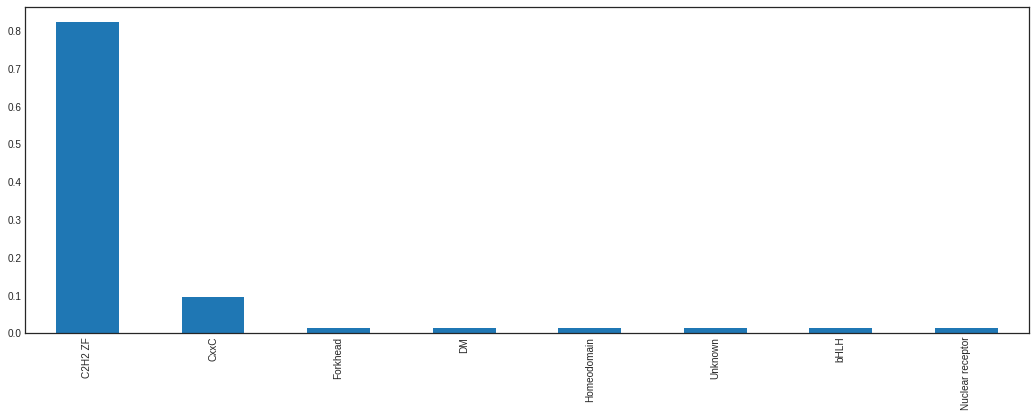

In [140]:
df_pos_res.plot(kind='bar',figsize=(18,6))

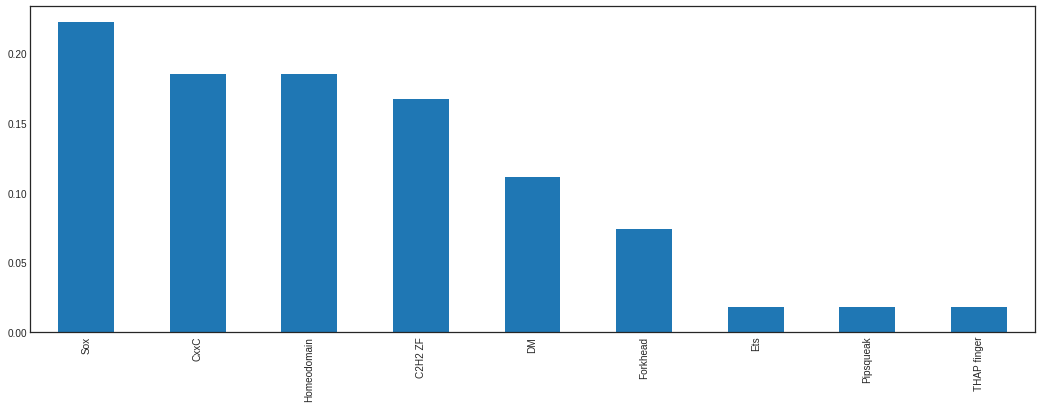

In [141]:
 df_neg_res.plot(kind='bar',figsize=(18,6))

In [142]:
df_pos_res

C2H2 ZF             0.821918
CxxC                0.095890
Forkhead            0.013699
DM                  0.013699
Homeodomain         0.013699
Unknown             0.013699
bHLH                0.013699
Nuclear receptor    0.013699
Name: Family, dtype: float64

In [143]:
df_neg_res

Sox            0.222222
CxxC           0.185185
Homeodomain    0.185185
C2H2 ZF        0.166667
DM             0.111111
Forkhead       0.074074
Ets            0.018519
Pipsqueak      0.018519
THAP finger    0.018519
Name: Family, dtype: float64

In [144]:
df_pos.shape,df_neg.shape

((73, 12), (54, 12))

In [145]:
df_pos.head()

,Query_ID,Target_ID,Optimal_offset,p-value,E-value,q-value,Overlap,Query_consensus,Target_consensus,Orientation,TF,Family
7,filter7,M6547_1.02,3.0,3.049430e-06,0.002235,0.004395,13.0,CGGGGTTGGGGGG,GCCGAGGCCTGGGGCCCCC,-,"ZFX,ZFY",C2H2 ZF
15,filter13,M4459_1.02,7.0,3.413670e-06,0.002502,0.004985,13.0,AGAGGGTGGGGGG,GTGCGGGGGCGGGGGGGGGG,+,EGR1,C2H2 ZF
22,filter25,M4459_1.02,7.0,5.818490e-08,0.000043,0.000058,13.0,GGAGGAGGGGGGG,GTGCGGGGGCGGGGGGGGGG,+,EGR1,C2H2 ZF
23,filter25,M6482_1.02,7.0,8.078280e-08,0.000059,0.000058,13.0,GGAGGAGGGGGGG,GGGGGGGGGCGGGGCCGGGG,+,"SP7,SP3,SP6,SP5,SP9",C2H2 ZF
24,filter25,M4604_1.02,2.0,3.926470e-06,0.002878,0.001894,13.0,GGAGGAGGGGGGG,GGGGAGGAGGGAGGGGAGGAG,+,ZNF263,C2H2 ZF


In [146]:
pos_size = len(set(df_pos['Target_ID']))
neg_size = len(set(df_neg['Target_ID']))
inters_size = len(set.intersection(set(df_pos['Target_ID']),set(df_neg['Target_ID'])))

In [147]:
pos_size,neg_size,inters_size

(23, 25, 7)

##### Venn diagrams

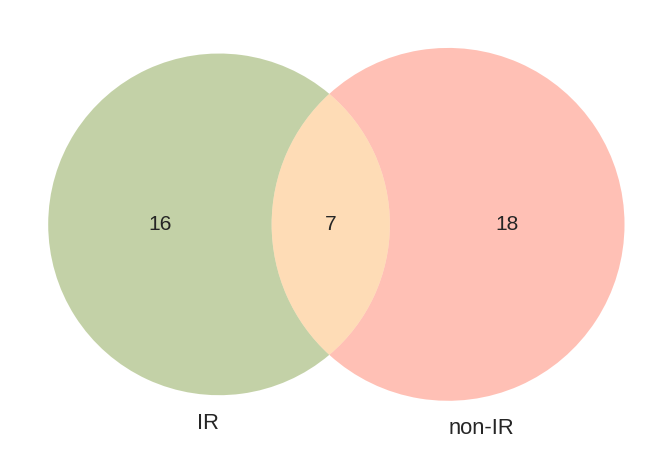

In [164]:
plt.figure(figsize=(14,8))
v = venn2(subsets=((pos_size),(neg_size),inters_size), set_labels=('IR','non-IR'),set_colors=('olivedrab','tomato'))
v.get_label_by_id('100').set_text(pos_size-inters_size)
v.get_label_by_id('010').set_text(neg_size-inters_size)

for text in v.set_labels:
    text.set_fontsize(22)

for text in v.subset_labels:
    text.set_fontsize(21)

#plt.text(-0.5,0.54,"IR vs. non-IR TF motif overlap",fontsize=25)
plt.savefig('IR_motif-overlap_venn.pdf',bbox_inches='tight')

In [149]:
df_pos.shape

(73, 12)

In [150]:
df_pos = df_pos.drop_duplicates(subset='Target_ID',keep='first')

In [151]:
df_pos.shape

(23, 12)

In [152]:
temp_res = df_pos['Family'].value_counts()
res = {}
res[temp_res.keys()[0]] = temp_res.values[0]
res[temp_res.keys()[1]] = temp_res.values[1]
res['Others'] = temp_res[2:].sum()
res.values()

dict_values([15, 2, 6])

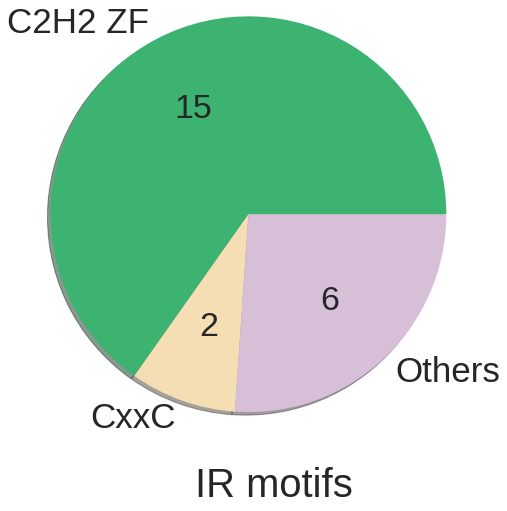

In [153]:
#res = df_pos['Family'].value_counts()[:4]
plt.figure(figsize=(7,7))
v = plt.pie(res.values(),explode=None,labels=res.keys(),shadow=True,labeldistance=1.09,radius=1.3,
            colors=['mediumseagreen','wheat','thistle','darksalmon'],
            autopct=lambda p: '{:.0f}'.format((p/100)*np.asarray(list(res.values())).sum())) #lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*res.sum())
for txt in v[1]:
    txt.set_fontsize(35)
for txt in v[2]:
    txt.set_fontsize(34)
plt.text(-0.35,-1.85,'IR motifs',fontsize=40)
plt.savefig('IR_motif-fam-pie_pos.pdf',bbox_inches='tight')

In [154]:
df_neg = df_neg.drop_duplicates(subset='Target_ID',keep='first')

In [158]:
temp_res = df_neg['Family'].value_counts()
res = {}
res[temp_res.keys()[0]] = temp_res.values[0]
res[temp_res.keys()[1]] = temp_res.values[1]
res[temp_res.keys()[2]] = temp_res.values[2]
res['Others'] = temp_res[3:].sum()
res.values()

dict_values([6, 5, 4, 10])

In [160]:
res

{'Homeodomain': 6, 'Sox': 5, 'C2H2 ZF': 4, 'Others': 10}

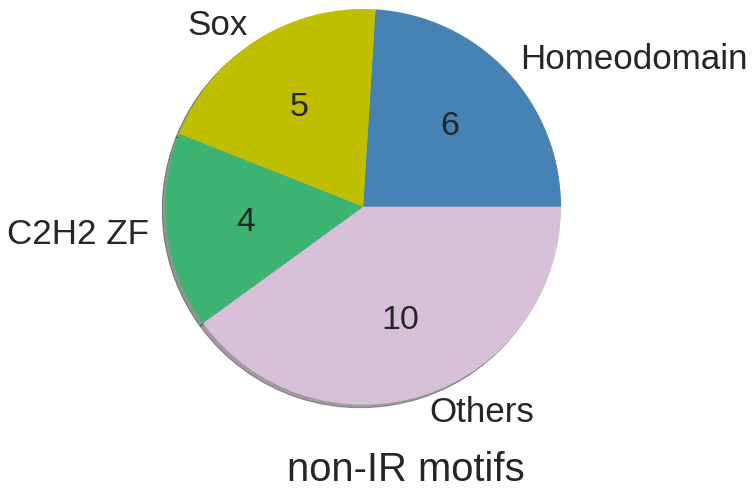

In [163]:
#res = df_neg['Family'].value_counts()[:4]
plt.figure(figsize=(7,7))
v = plt.pie(res.values(),explode=None,labels=res.keys(),shadow=True,labeldistance=1.09,radius=1.3,
            colors=['steelblue','y','mediumseagreen','thistle'],#'mediumseagreen','y'],
            autopct=lambda p: '{:.0f}'.format((p/100)*np.asarray(list(res.values())).sum()))
for txt in v[1]:
    txt.set_fontsize(35)
for txt in v[2]:
    txt.set_fontsize(34)
    
plt.text(-0.5,-1.8,'non-IR motifs',fontsize=40)
plt.savefig('IR_motif-fam-pie_neg.pdf',bbox_inches='tight')

### Leave one chrom out AUC plots

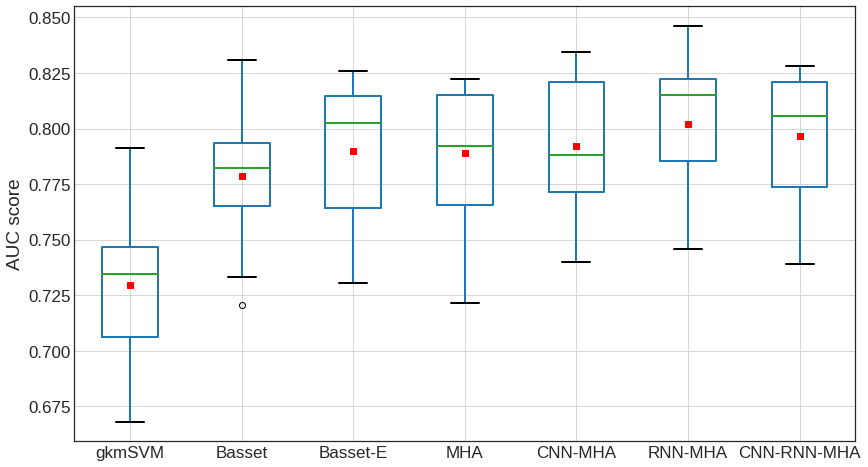

In [541]:
#
#import pickle
#import matplotlib.pyplot as plt
#import numpy as np
#import pandas as pd

gkmSVM = np.loadtxt('../../Gapped_SVM_Analysis/Encode_IR_DHSs-idiffIR/leave_chr_out/final_results_all_chr_kundaje_Remaining.txt',dtype=str)

resgkSVM = pd.DataFrame(gkmSVM[1:,[0,5]],columns = ['chromosome','gkmSVM'])

resgkSVM['chromosome'] = resgkSVM['chromosome'].apply(lambda x: x[0]+x[1]+x[2]+'0'+x[3] if len(x)==4 else x)

resfinal = resgkSVM.sort_values(by='chromosome')

#resfinal = resgkSVM.reset_index()

resfinal.head()

archs = ['Basset','Basset-E','MHA','CNN-MHA','RNN-MHA','CNN-RNN-MHA']
for arch in archs:
    if arch == 'MHA':
        fname = arch[:-1] + '-PosEnc'
    elif 'MHA' in arch:
        fname = arch[:-1] + '-noPosEnc'
    else:
        if '-E' in arch:
            fname = arch.split('-')[0] + '-Embds'
        else:
            fname = arch + '-noEmbds'
            
    with open('../DeepChASe_pytorch/Finalzed_Results/'+fname+'_test_aucs.pckl','rb') as f:
        data = pickle.load(f)
    
    data = pd.DataFrame(list(data.items()), columns=['chromosome', ''+arch])
    data['chromosome'] = data['chromosome'].apply(lambda x: x[0]+x[1]+x[2]+'0'+x[3] if len(x)==4 else x)
    
    resfinal = pd.merge(resfinal,data,how='right',on='chromosome')
    
resfinal['gkmSVM'] = pd.to_numeric(resfinal['gkmSVM'])

#resfinal.plot(kind='box')
bp = resfinal.boxplot(column=['gkmSVM','Basset','Basset-E','MHA','CNN-MHA','RNN-MHA','CNN-RNN-MHA'],
                 figsize=(14,8),
                 fontsize=17,
                 rot=0,
                 grid=True,
                 return_type='dict')
plt.ylabel("AUC score", size=19)


for key in bp.keys():
    for item in bp[key]:
        item.set_linewidth(2)

means = resfinal.mean()        
 
plt.plot([1,2,3,4,5,6,7],means, 'rs')
plt.savefig('../DeepChASe_pytorch/Finalzed_Results/AUCs_Leave-One-Chrom-Out_IR.pdf',bbox_inches='tight')